### ```NEWTON'S FORWARD DIFFERENCE INTERPOLATION```

- Newton's Forward Difference Interpolation is a method used to estimate values between known data points using equally spaced intervals. It constructs a polynomial that passes through all given data points.

The interpolated value at x = 3 is: 20.0


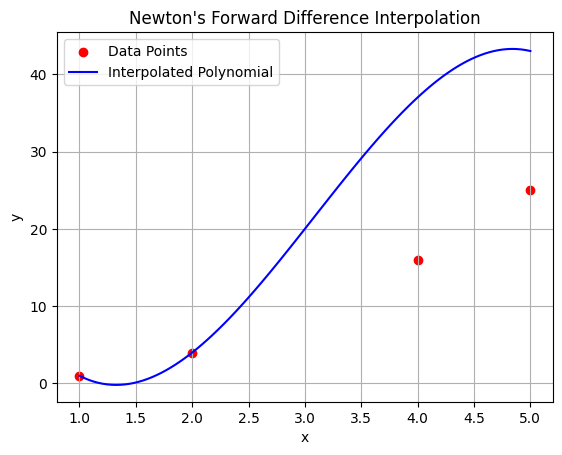

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to calculate forward differences
def forward_difference(y_values):
    n = len(y_values)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y_values  # First column is the given y-values

    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = diff_table[i + 1][j - 1] - diff_table[i][j - 1]

    return diff_table

# Function for Newton's Forward Difference Interpolation
def newton_forward_interpolation(x_values, y_values, x_value):
    n = len(x_values)
    diff_table = forward_difference(y_values)
    result = y_values[0]  # First term of the interpolation polynomial

    h = x_values[1] - x_values[0]  # Assuming equally spaced x-values

    # Iteratively calculate the terms of the interpolation polynomial
    for i in range(1, n):
        term = diff_table[0][i]
        for j in range(i):
            term *= (x_value - x_values[j])
        term /= math.factorial(i)
        result += term

    return result

# Example Test Case
x_values = np.array([1, 2, 4, 5])  # Given x-values
y_values = np.array([1, 4, 16, 25])  # Given y-values

# Value to interpolate
x_value = 3

# Call the interpolation function
interpolated_value = newton_forward_interpolation(x_values, y_values, x_value)
print(f"The interpolated value at x = {x_value} is: {interpolated_value}")

# Plotting the given data points and interpolation
x_interp = np.linspace(min(x_values), max(x_values), 100)
y_interp = [newton_forward_interpolation(x_values, y_values, xi) for xi in x_interp]

plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.plot(x_interp, y_interp, color='blue', label='Interpolated Polynomial')
plt.title("Newton's Forward Difference Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## ``` LAGRANGE INTERPOLATION ```

- Lagrange interpolation is a method for finding a polynomial that passes through a given set of data points. Unlike Newton's method, it doesn't require equally spaced intervals and works with any set of distinct x-values

The interpolated value at x = 2.5 is: 6.25


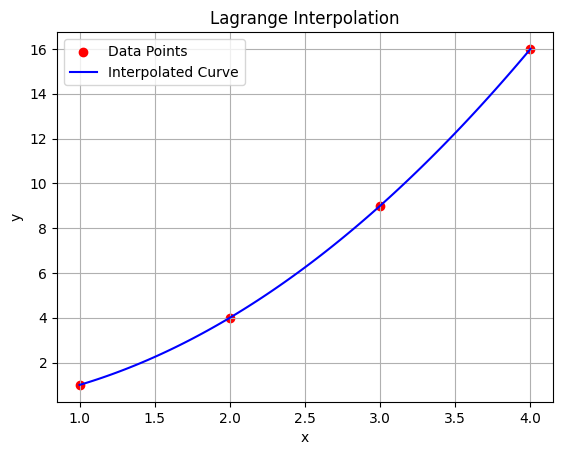

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Lagrange interpolation
def lagrange_interpolation(x_values, y_values, x_value):
    n = len(x_values)
    result = 0

    for i in range(n):
        # Calculate Lagrange basis polynomial L_i(x)
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x_value - x_values[j]) / (x_values[i] - x_values[j])
        result += term

    return result

# Example Test Case
x_values = np.array([1, 2, 3, 4])  # Given x-values
y_values = np.array([1, 4, 9, 16]) # Given y-values

# Value to interpolate
x_value = 2.5

# Call the interpolation function
interpolated_value = lagrange_interpolation(x_values, y_values, x_value)

print(f"The interpolated value at x = {x_value} is: {interpolated_value}")

# Plotting the data points and interpolation
x_interp = np.linspace(min(x_values), max(x_values), 100)
y_interp = [lagrange_interpolation(x_values, y_values, xi) for xi in x_interp]

plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.plot(x_interp, y_interp, color='blue', label='Interpolated Curve')
plt.title('Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### LAGRANGE INTERPOLATION WITH USER INPUT CHOICE

In [4]:
import numpy as np

def read_data_points(n):
    x = np.zeros(n)
    y = np.zeros(n)
    print("Enter data for x and y:")
    for i in range(n):
        x[i] = float(input(f"x[{i}] = "))
        y[i] = float(input(f"y[{i}] = "))
    return x, y

def lagrange_interpolation(x, y, xp):
    n = len(x)
    yp = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p *= (xp - x[j]) / (x[i] - x[j])
        yp += p * y[i]
    return yp

def main():
    print("\nLAGRANGE INTERPOLATION\n")
    default = input("Use default data points? (y/n): ").strip().lower() == 'y'

    if default:
        x = np.array([0, 1, 2, 3], dtype=float)
        y = np.array([1, 2, 3, 5], dtype=float)
        print("\nUsing Default Data Points:")
        print(f"x: {x}")
        print(f"y: {y}")
    else:
        n = int(input("Enter number of data points: "))
        x, y = read_data_points(n)

    # Reading interpolation point
    xp = float(input("\nEnter interpolation point: "))

    # Calculate interpolated value
    yp = lagrange_interpolation(x, y, xp)

    # Displaying output
    print(f"\nInterpolated value at x = {xp:.3f} is y = {yp:.3f}.")

if __name__ == "__main__":
    main()



LAGRANGE INTERPOLATION


Using Default Data Points:
x: [0. 1. 2. 3.]
y: [1. 2. 3. 5.]

Interpolated value at x = 1.000 is y = 2.000.


### ```  LEAST SQUARE METHOD FOR LINEAR, EXPONENTIAL AND POLYNOMIAL CURVE FITTING ```    [IMPORTANT]

- The Least Square Method is a statistical technique used to find the best-fitting curve through a set of data points by minimizing the sum of squared residuals (differences between observed and predicted values).

Linear Regression: y = 1.0x + 0.0
Exponential Regression: y = 0.9955274925414412e^(1.0011872997986735x)
Polynomial Regression (degree 2): y = 16.800000000000303x^0 + -23.600000000000193x^1 + 9.000000000000036x^2


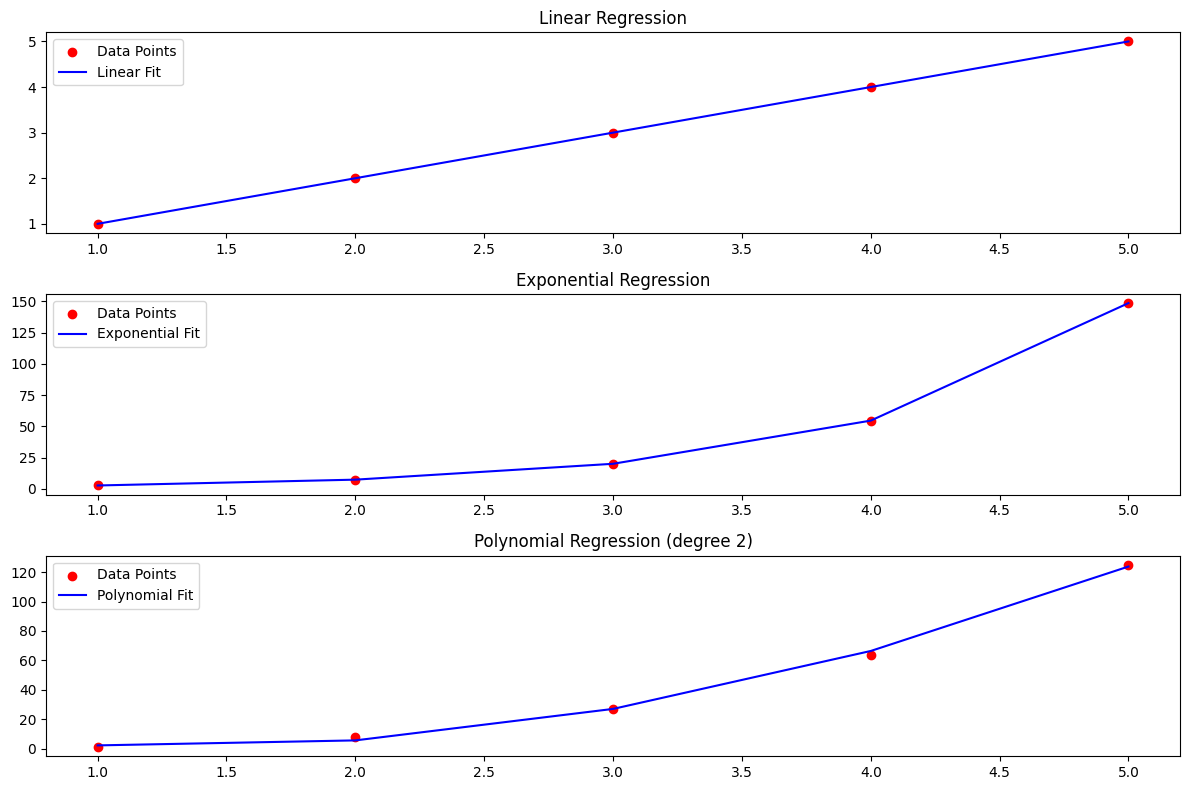

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Linear regression function
def linear_regression(x, y):
    m = (np.sum(x * y) - len(x) * np.mean(x) * np.mean(y)) / (np.sum(x**2) - len(x) * np.mean(x)**2)
    c = np.mean(y) - m * np.mean(x)
    return m, c

# Exponential regression function
def exponential_regression(x, y):
    y_log = np.log(y)
    m, c = linear_regression(x, y_log)
    a = np.exp(c)
    b = m
    return a, b

# Polynomial regression function
def polynomial_regression(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    return coeffs

# Test data (example)
x_values = np.array([1, 2, 3, 4, 5])
y_values_linear = np.array([1, 2, 3, 4, 5])
y_values_exponential = np.array([2.7, 7.4, 20.1, 54.6, 148.4])
y_values_polynomial = np.array([1, 8, 27, 64, 125])

# Linear regression
m, c = linear_regression(x_values, y_values_linear)
print(f"Linear Regression: y = {m}x + {c}")

# Exponential regression
a, b = exponential_regression(x_values, y_values_exponential)
print(f"Exponential Regression: y = {a}e^({b}x)")

# Polynomial regression (degree 2)
degree = 2
coeffs = polynomial_regression(x_values, y_values_polynomial, degree)
print(f"Polynomial Regression (degree {degree}): y = " + ' + '.join([f'{c}x^{i}' for i, c in enumerate(coeffs[::-1])]))

# Plotting the results
plt.figure(figsize=(12, 8))

# Plotting linear regression result
plt.subplot(3, 1, 1)
plt.scatter(x_values, y_values_linear, color='red', label='Data Points')
plt.plot(x_values, m * x_values + c, color='blue', label='Linear Fit')
plt.title('Linear Regression')
plt.legend()

# Plotting exponential regression result
plt.subplot(3, 1, 2)
plt.scatter(x_values, y_values_exponential, color='red', label='Data Points')
plt.plot(x_values, a * np.exp(b * x_values), color='blue', label='Exponential Fit')
plt.title('Exponential Regression')
plt.legend()

# Plotting polynomial regression result
plt.subplot(3, 1, 3)
plt.scatter(x_values, y_values_polynomial, color='red', label='Data Points')
plt.plot(x_values, np.polyval(coeffs, x_values), color='blue', label='Polynomial Fit')
plt.title(f'Polynomial Regression (degree {degree})')
plt.legend()

plt.tight_layout()
plt.show()


### least square method for linear regression IMPORTANT 

In [5]:
import numpy as np

def read_data(n):
    x = np.zeros(n)
    y = np.zeros(n)
    print("Enter data points:")
    for i in range(n):
        x[i] = float(input(f"x[{i}] = "))
        y[i] = float(input(f"y[{i}] = "))
    return x, y

def calculate_coefficients(x, y):
    n = len(x)
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumx2 = np.sum(x ** 2)
    sumxy = np.sum(x * y)

    b = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx ** 2)
    a = (sumy - b * sumx) / n
    return a, b

def display_results(a, b):
    print()
    print("Coefficients are:")
    print(f"a (Intercept): {a:.4f}")
    print(f"b (Slope): {b:.4f}")
    print(f"And the equation is: y = {a:.4f} + {b:.4f}x")

def main():
    print("LEAST SQUARES METHOD FOR LINEAR REGRESSION")
    print()
    
    default = input("Use default data points? (y/n): ").strip().lower() == "y"

    if default:
        x = np.array([1, 2, 3, 4, 5], dtype=float)
        y = np.array([1.2, 2.8, 4.5, 3.7, 5.5], dtype=float)
        print("Using Default Data Points:")
        print("x:", x)
        print("y:", y)
    else:
        n = int(input("How many data points? "))
        x, y = read_data(n)

    # Calculate coefficients
    a, b = calculate_coefficients(x, y)

    # Display results
    display_results(a, b)

if __name__ == "__main__":
    main()


LEAST SQUARES METHOD FOR LINEAR REGRESSION

Using Default Data Points:
x: [1. 2. 3. 4. 5.]
y: [1.2 2.8 4.5 3.7 5.5]

Coefficients are:
a (Intercept): 0.6900
b (Slope): 0.9500
And the equation is: y = 0.6900 + 0.9500x


### ``` CUBIC SPLINE INTERPOLATION ```

- Cubic Spline Interpolation is an advanced interpolation method that constructs a smooth curve through data points using piecewise cubic polynomials. Unlike other methods, it ensures both continuity and smoothness across the entire range.

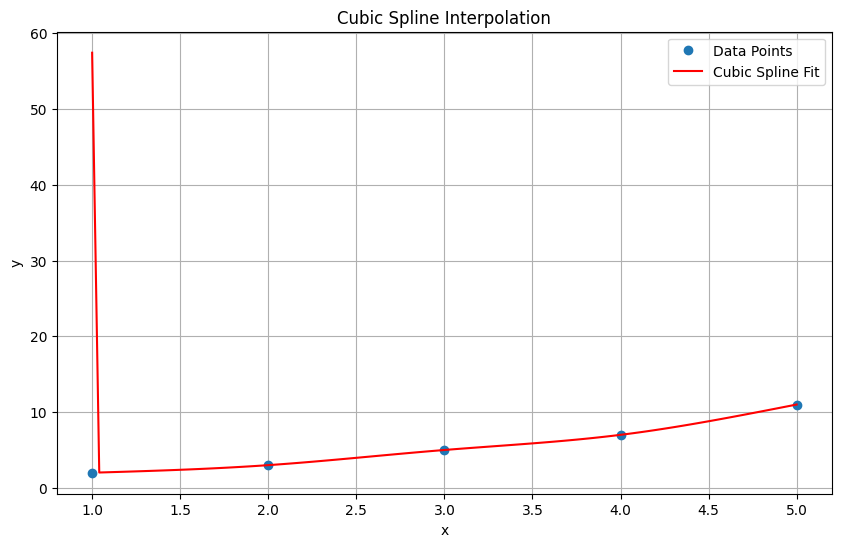

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to solve the cubic spline interpolation
def cubic_spline_interpolation(x, y):
    n = len(x)
    h = np.diff(x)

    # Create a system of linear equations
    A = np.zeros((n, n))
    b = np.zeros(n)

    # Set up the system of equations
    A[0, 0] = 1
    A[-1, -1] = 1

    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * (y[i+1] - y[i]) / h[i] - 3 * (y[i] - y[i-1]) / h[i-1]

    # Solve for the second derivatives
    c = np.linalg.solve(A, b)

    # Calculate the coefficients a, b, d
    a = y[:-1]
    d = np.zeros(n-1)
    b = np.zeros(n-1)

    for i in range(n-1):
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])

    return a, b, c[:-1], d

# Function to evaluate the cubic spline at any x value
def evaluate_spline(x, x_values, a, b, c, d):
    n = len(x_values)
    i = np.searchsorted(x_values, x) - 1
    dx = x - x_values[i]
    return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

# Test data (example)
x_values = np.array([1, 2, 3, 4, 5])
y_values = np.array([2, 3, 5, 7, 11])

# Perform cubic spline interpolation
a, b, c, d = cubic_spline_interpolation(x_values, y_values)

# Generate a fine grid of x values for plotting
x_fine = np.linspace(1, 5, 100)
y_fine = np.array([evaluate_spline(x, x_values, a, b, c, d) for x in x_fine])

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o', label='Data Points')
plt.plot(x_fine, y_fine, label='Cubic Spline Fit', color='red')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
